# Assignment 2, TET4565 


## Dependencies / imports


In [1]:
import pyomo.environ as pyo
import numpy as np
from pyomo.environ import ConcreteModel,Set,RangeSet,Param,Suffix,Reals,NonNegativeReals,NonPositiveReals,Binary,Objective,minimize,maximize,value
from pyomo.core import Constraint,Var,Block,ConstraintList
from pyomo.opt import SolverFactory, SolverStatus, TerminationCondition
import matplotlib.pyplot as plt
from calculations.datahandling import*
from calculations.data_processor import* 
from Optimization_modelling.generalized_two_stage_final import*


c:\Users\oscar\OneDrive\Dokumenter\Høst 2023\TET4565 Spesialiseringsemne\Hydro_optimization\calculations\datahandling.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  irr_data = pd.read_csv(file_path, parse_dates=['time'], index_col='time', dtype=float)


## Code for data processing 

In [2]:
#Read of parameters for portfolio
data=InputData('data/Parameters.xlsx')

#Start and end dates of the optimization
start_date='2018-05-28 13:00'
end_date='2018-05-28 13:00'

#Original forecast for solar power production
Solar_p=read_solar_data('data/Data_solar_irr_NOR.csv', 'data/PV_spec.xlsx', start_date, end_date)

#Scenarios for solar forecast 
S_high=scale_dict(Solar_p, 1.5)
S_avg=scale_dict(Solar_p, 1)
S_low=scale_dict(Solar_p, 0.5)
#Load 
#L= {1:30, 2:20, 3:20, 4:30, 5:50, 6:80, 7:50, 8:90, 9:110, 10:150, 11:120, 12:80, 13:70, 14:80, 15:90, 16:160, 17:170, 18:150, 19:120, 20:100, 21:70, 22:60, 23:50, 24:40}


c:\Users\oscar\OneDrive\Dokumenter\Høst 2023\TET4565 Spesialiseringsemne\Hydro_optimization\calculations\datahandling.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  irr_data = pd.read_csv(file_path, parse_dates=['time'], index_col='time', dtype=float)


## Code for defining necessary functions 

## Variant 1 (Expected value of all scenarios/ base case)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 30 columns and 71 nonzeros
Model fingerprint: 0x286b31ab
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [6e+01, 1e+02]
  RHS range        [2e+01, 2e+02]
Presolve removed 38 rows and 25 columns
Presolve time: 0.01s
Presolved: 3 rows, 5 columns, 7 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time


       0   -4.1000000e+03   1.687500e+01   0.000000e+00      0s
       2    3.3000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.300000000e+03
Model unknown

  Variables:
    p : Size=4, Index=p_index
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
        ('Hydro1', 1) :     0 :  20.0 :    60 : False : False :  Reals
        ('Hydro1', 2) :     0 :  None :    60 : False :  True :  Reals
        ('Hydro2', 1) :     0 :   5.0 :   100 : False : False :  Reals
        ('Hydro2', 2) :     0 :  None :   100 : False :  True :  Reals
    p_s1 : Size=6, Index=p_s1_index
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
         ('S_avg', 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
         ('S_avg', 2) :     0 :  60.0 :  None : False : False : NonNegativeReals
        ('S_high', 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('S_hig

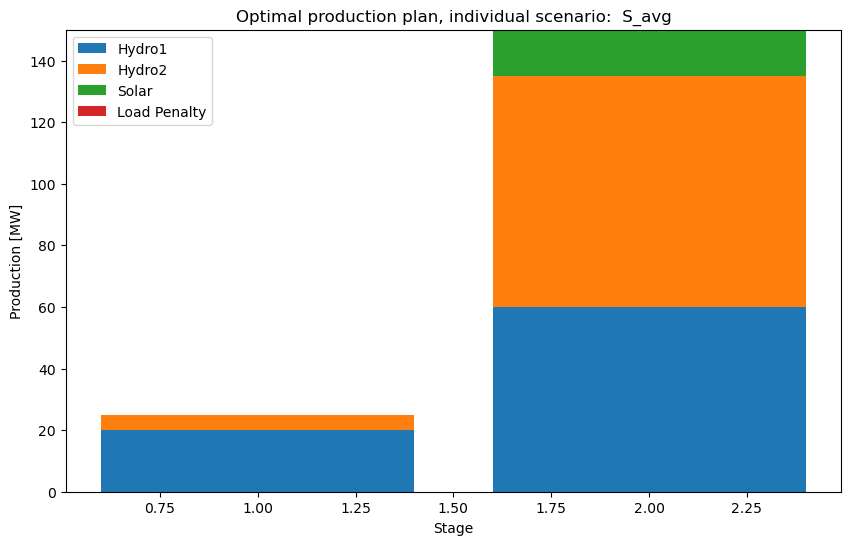

{'Hydro1': 20.0, 'Hydro2': 5.0}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 60.0
hydro2 S_avg: 75.0
hydro1 S_low: 0.0
hydro2 S_low: 0.0


In [3]:
Constants1= {
    'Load_penalty':200, 
    'Hydro_cap':80,
    'Load':150,
    'Market': 60,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':1, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_base=model_setup(Constants1, data)
solve(m_base)
displayresults(m_base)
plotting(m_base)

## Variant 2 (Each scenario individually)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 30 columns and 71 nonzeros
Model fingerprint: 0xbacb4afe
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [6e+01, 1e+02]
  RHS range        [3e+01, 2e+02]
Presolve removed 38 rows and 25 columns
Presolve time: 0.01s
Presolved: 3 rows, 5 columns, 7 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.1000000e+03   1.500000e+01   0.000000e+00      0s
       2    2.4000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  2.400000000e+03


Model unknown

  Variables:
    p : Size=4, Index=p_index
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
        ('Hydro1', 1) :     0 :  20.0 :    60 : False : False :  Reals
        ('Hydro1', 2) :     0 :  None :    60 : False :  True :  Reals
        ('Hydro2', 1) :     0 :  20.0 :   100 : False : False :  Reals
        ('Hydro2', 2) :     0 :  None :   100 : False :  True :  Reals
    p_s1 : Size=6, Index=p_s1_index
        Key           : Lower : Value : Upper : Fixed : Stale : Domain
         ('S_avg', 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
         ('S_avg', 2) :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('S_high', 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
        ('S_high', 2) :     0 :  60.0 :  None : False : False : NonNegativeReals
         ('S_low', 1) :     0 :   0.0 :  None : False : False : NonNegativeReals
         ('S_low', 2) :     0 :   0.0 :  None : False : False : NonNegative

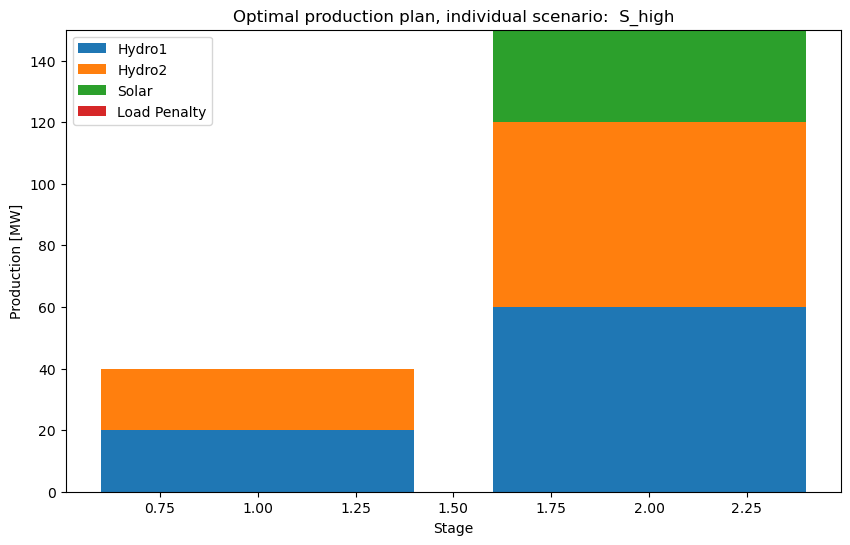

{'Hydro1': 20.0, 'Hydro2': 20.0}
hydro1 S_high: 60.0
hydro2 S_high: 60.0
hydro1 S_avg: 0.0
hydro2 S_avg: 0.0
hydro1 S_low: 0.0
hydro2 S_low: 0.0


In [4]:
Constants2_1= {
    'Load_penalty':200, 
    'Hydro_cap':80,
    'Load':150,
    'Market': 60,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':1, 'S_avg':0, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_high=model_setup(Constants2_1, data)
solve(m_high)
displayresults(m_high)
plotting(m_high)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 30 columns and 71 nonzeros
Model fingerprint: 0x286b31ab
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [6e+01, 1e+02]
  RHS range        [2e+01, 2e+02]
Presolve removed 38 rows and 25 columns
Presolve time: 0.01s
Presolved: 3 rows, 5 columns, 7 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0   -4.1000000e+03   1.687500e+01   0.000000e+00      0s
       2    3.3000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.300000000e+03
Model unknown

  Variabl

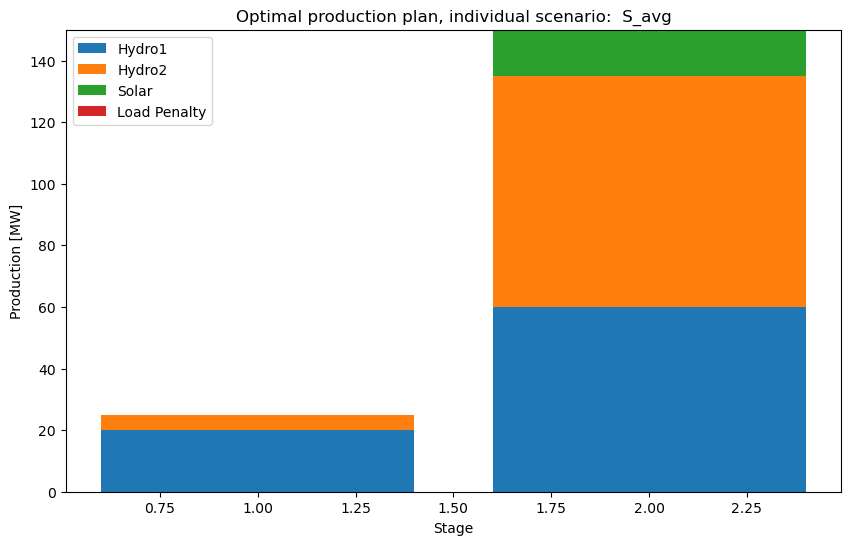

{'Hydro1': 20.0, 'Hydro2': 5.0}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 60.0
hydro2 S_avg: 75.0
hydro1 S_low: 0.0
hydro2 S_low: 0.0


In [5]:
Constants2_2= {
    'Load_penalty':200, 
    'Hydro_cap':80,
    'Load':150,
    'Market': 60,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':1, 'S_low':0},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35} 
         
}
m_avg=model_setup(Constants2_2, data)
solve(m_avg)
displayresults(m_avg)
plotting(m_avg)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 30 columns and 71 nonzeros
Model fingerprint: 0x40098d09
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 2e+02]
  Bounds range     [6e+01, 1e+02]
  RHS range        [6e+01, 2e+02]
Presolve removed 40 rows and 28 columns
Presolve time: 0.01s
Presolved: 1 rows, 2 columns, 2 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8000000e+03   5.000000e+00   0.000000e+00      0s
       1    5.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.02 seconds (0.00 work units)
Optimal objective  5.600000000e+03
Model unknown

  Variabl

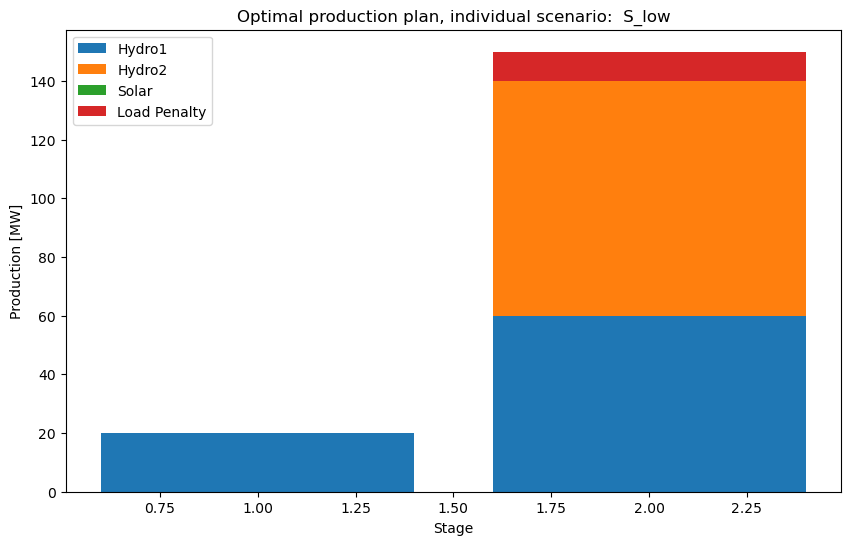

{'Hydro1': 20.0, 'Hydro2': 0.0}
hydro1 S_high: 0.0
hydro2 S_high: 0.0
hydro1 S_avg: 0.0
hydro2 S_avg: 0.0
hydro1 S_low: 60.0
hydro2 S_low: 80.0


In [6]:
Constants2_3= {
    'Load_penalty':200, 
    'Hydro_cap':80,
    'Load':150,
    'Market': 60,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':0, 'S_avg':0, 'S_low':1},
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}       
}
m_low=model_setup(Constants2_3, data)
solve(m_low)
displayresults(m_low)
plotting(m_low)

## Variant 3 (Stochastic optimization problem w/ non-anticipativity)

source (type: set).  This WILL potentially lead to nondeterministic behavior
in Pyomo
Set parameter QCPDual to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8550U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 41 rows, 30 columns and 71 nonzeros
Model fingerprint: 0x96229462
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [8e+00, 7e+01]
  Bounds range     [6e+01, 1e+02]
  RHS range        [2e+01, 2e+02]
Presolve removed 36 rows and 22 columns
Presolve time: 0.01s
Presolved: 5 rows, 8 columns, 12 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    3.0583333e+03   3.125000e+01   0.000000e+00      0s
       3    3.9750000e+03   0.000000e+00   0.000000e+00      0s

Solved in 3 iterations and 0.02 seconds (0.00 work units)
Optimal objective  3.975000000e+03
Model unknown

  Variab

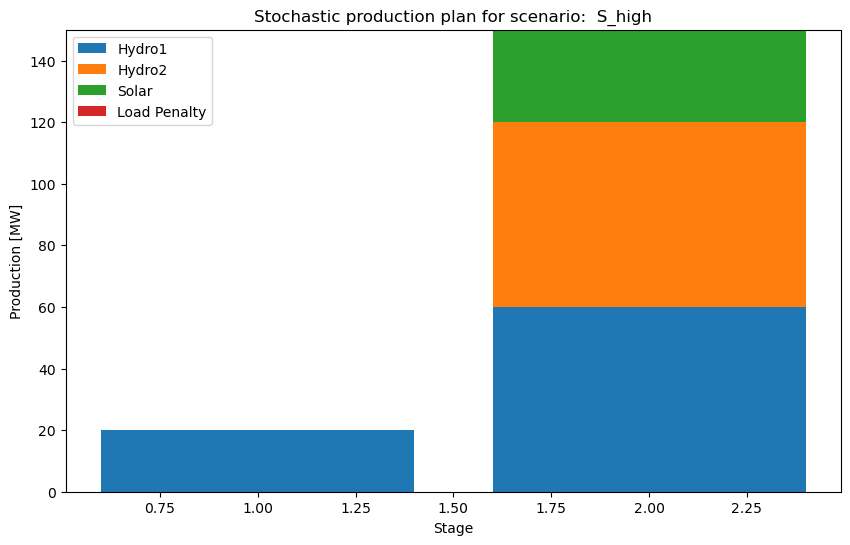

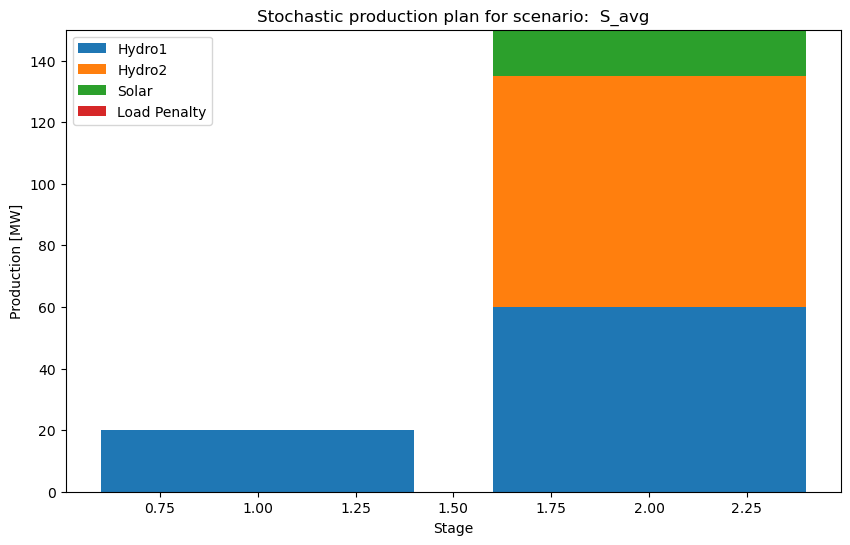

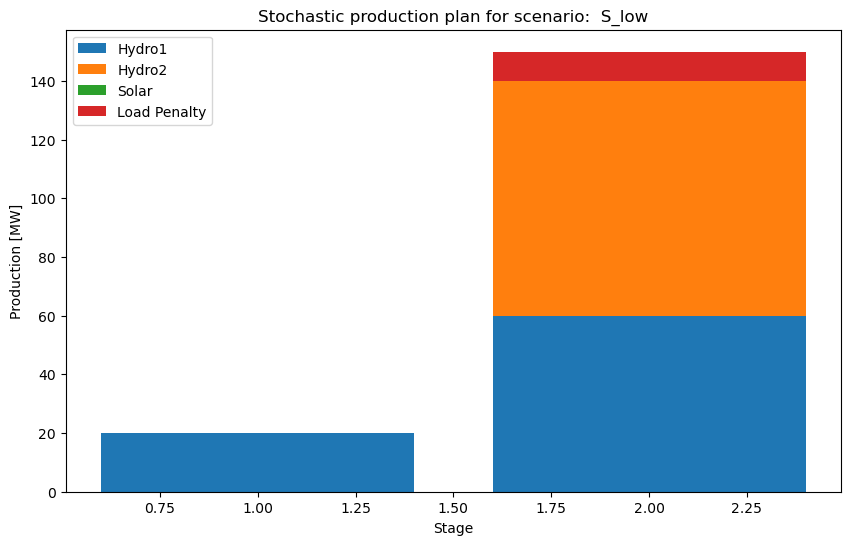

{'Hydro1': 20.0, 'Hydro2': 0.0}
hydro1 S_high: 60.0
hydro2 S_high: 60.0
hydro1 S_avg: 60.0
hydro2 S_avg: 75.0
hydro1 S_low: 60.0
hydro2 S_low: 80.0


In [7]:
Constants2_3= {
    'Load_penalty':200, 
    'Hydro_cap':80,
    'Load':150,
    'Market': 60,
    'Scenarios':['S_high', 'S_avg', 'S_low'], 
    'probs':{'S_high':1/3, 'S_avg':1/3, 'S_low':1/3}, 
    'yi_s1':{'S_high':25, 'S_avg':25, 'S_low':25}, 
    'yi_s2':{'S_high':35, 'S_avg':35, 'S_low':35}        
}
m_stoch=model_setup(Constants2_3, data)
solve(m_stoch)
displayresults(m_stoch)
plotting_stoch(m_stoch)